???? First few rows of data:
   GrLivArea  BedroomAbvGr  FullBath  SalePrice
0       1710             3         2     208500
1       1262             3         2     181500
2       1786             3         2     223500
3       1717             3         1     140000
4       2198             4         2     250000
???? Model Evaluation:
- Mean Squared Error: 2806426667.25
- R² Score: 0.6341
???? Predicted price for 2000 sqft, 3BR, 2BA: $240,377.51


C:\Users\eshun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


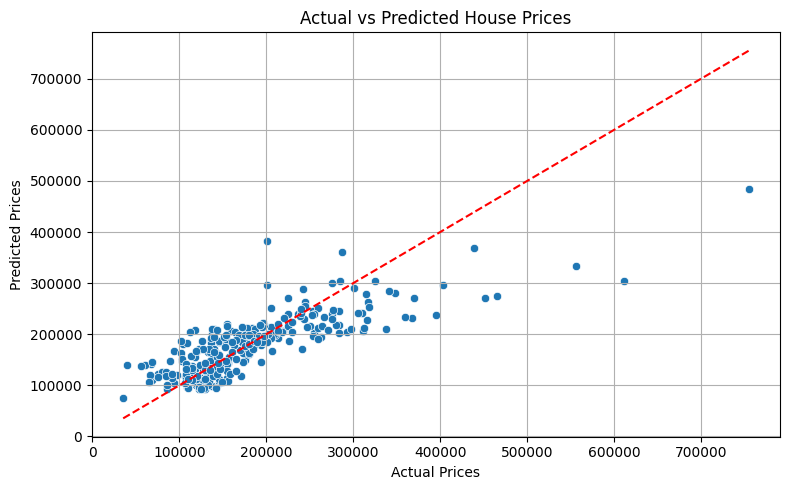

In [6]:


# ✅ Load the dataset
import pandas as pd
df = pd.read_csv("train.csv")

# Print the respective columns
print("???? First few rows of data:")
print(df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']].head())

# ✅ Train Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features and Target
X = df[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = df['SalePrice']

# Remove missing values
X = X.dropna()
y = y.loc[X.index]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"???? Model Evaluation:")
print(f"- Mean Squared Error: {mse:.2f}")
print(f"- R² Score: {r2:.4f}")

# ✅ Predict a custom house price
example = np.array([[2000, 3, 2]])  # [GrLivArea, BedroomAbvGr, FullBath]
predicted_price = model.predict(example)[0]
print(f"???? Predicted price for 2000 sqft, 3BR, 2BA: ${predicted_price:,.2f}")

# ✅ Plot Actual vs Predicted
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid(True)
plt.tight_layout()
plt.show()